Import modules.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import chiron


In [2]:
base_lr = 0.0
max_lr = 1.0
step_size = 100
gamma = 0.999

schedulers = {
    "Triangular": chiron.TriangularCLR(base_lr, max_lr, step_size),
    "Triangular2": chiron.Triangular2CLR(base_lr, max_lr, step_size),
    "Exp Range": chiron.ExponentialCLR(base_lr, max_lr, step_size, gamma),
}


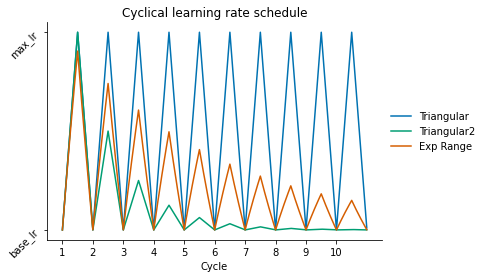

In [3]:
num_cycles = 10
num_steps = 2 * step_size * num_cycles


def get_lr(scheduler):
    lr = np.empty(num_steps)
    for step in range(num_steps):
        cycle = scheduler.get_cycle(step)
        lr[step] = scheduler.get_lr(step, cycle)
    return lr


plt.style.use("seaborn-colorblind")
fig, ax = plt.subplots()
for label, scheduler in schedulers.items():
    lr = get_lr(scheduler)
    ax.plot(lr, label=label)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xticks(np.arange(0, num_steps, 2 * step_size))
ax.set_xticklabels(np.arange(1, num_cycles + 1))
ax.set_yticks([base_lr, max_lr])
ax.set_yticklabels(["base_lr", "max_lr"], rotation=45.0)
ax.set_title("Cyclical learning rate schedule")
ax.set_xlabel("Cycle")
for key in "top", "right":
    ax.spines[key].set_visible(False)
